**Data Science & Business Analytics Task 1:** Percentage prediction of student based on number of hours of study using simple linear regresssion.

**Name: Srijan Gupta**

**Organization: The Sparks Foundation**

**GRIPNOV20**



In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Getting the data from the url and saving it in pandas dataframe

In [ ]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Using the info and describe functions to get more details about the data like average, max, min etc.

In [ ]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Using the **seaborn** library of python to easily plot the data as a scatter plot, bar plot and linear regression plot in which seaborn tries to predict the best line of fit by itself.

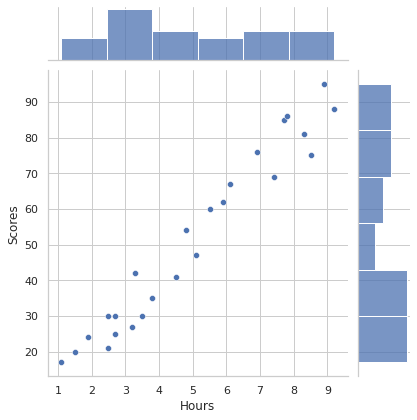

In [ ]:

sns.set_style('whitegrid')
sns.jointplot(data=s_data,x='Hours',y='Scores')

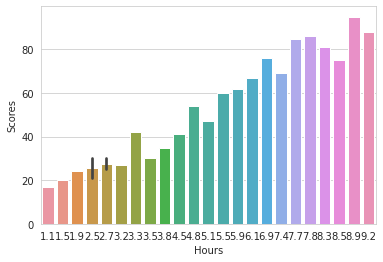

In [ ]:
sns.barplot(data=s_data,x='Hours',y='Scores')

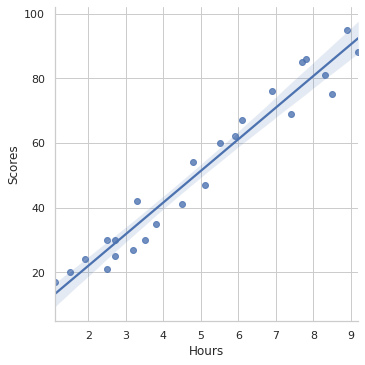

In [ ]:
sns.lmplot(x='Hours',y='Scores',data=s_data)

Using the corr funtion to find the coorelation between x and y which will tell how much y is dependant on x

In [ ]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
X=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values
print("Shape of X is: ",X.shape)
print("Shape of y is: ",y.shape)

Shape of X is:  (25, 1)
Shape of y is:  (25,)


Using the scikit learn module of python to split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
print("Shape of X train is: ",X_train.shape)
print("Shape of y  train is: ",y_train.shape)
print('-------------------------------')
print("Shape of X test is: ",X_test.shape)
print("Shape of y  test is: ",y_test.shape)

Shape of X train is:  (20, 1)
Shape of y  train is:  (20,)
-------------------------------
Shape of X test is:  (5, 1)
Shape of y  test is:  (5,)


Again using the sklearn module to conveniently apply Linear regression to the data and get the predicted output

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting the line that we got along with the actual y values

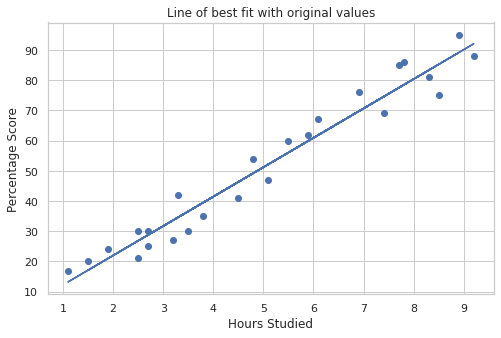

In [ ]:

line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.figure(figsize=(8,5))
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.title('Line of best fit with original values')
plt.show()

In [ ]:
y_predicted=model.predict(X_test)
predicted_df=pd.DataFrame({'Hours studied':X_test.reshape(-1,),'Predicted percentage score':y_predicted,'Actual percentage score':y_test})
predicted_df

,Hours studied,Predicted percentage score,Actual percentage score
0,2.5,26.845397,30
1,7.7,77.458594,85
2,3.8,39.498696,35
3,7.4,74.538601,69
4,5.5,56.045318,60


Using the metrics submodule to calculate mean sqaured error, root mean squared error and absolute error on the test values respectively.

In [73]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predicted)) 
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_predicted)))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_predicted))


Mean Absolute Error: 4.937597792467706
Root Mean Squared Error: 2.2220706092443834
Mean Squared Error: 26.675642597052256


Making the prediction on a user given hours of study

In [ ]:
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 92.54521954029958
